In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters
import nest_asyncio
from backtester import Backtester
from strategy import MAStrategy, HigherHighLowerLow
from historical_data_processor import DeribitDataProcessor as Deribit

nest_asyncio.apply() # added this cuz the original class uses asyncio; jupyter kernel has built in asyncio in place already



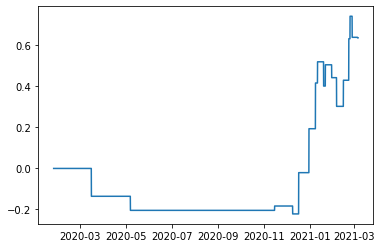

In [2]:
ma = MAStrategy(Deribit, '2020', '01', '26', holding_period=72, up_multiplier=1.2, down_multiplier=0.9, lookback_period1=10, lookback_period2=20)
ma.run_backtester()
ma.df.to_csv('ma_2H_new.csv')